In [1]:
%matplotlib inline

import os

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('ggplot')

In [2]:
def read_data(dir_path, file_prefix, r):
    file_path = os.path.join(dir_path, '{}_{}.csv'.format(file_prefix, r))
    with open(file_path, 'r') as f:
        data = np.fromstring(f.read().strip(), sep=',').astype('int32')
    
    return data

## Market predictability

## Market predictability (per agent)

## Number of active speculators

## Market crashes

## Volatility and volume clustering

[]

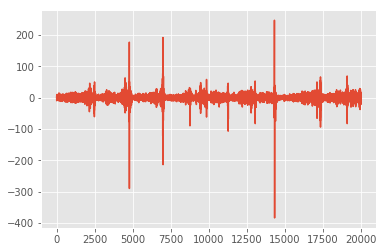

In [31]:
# Parameters
s = 2
p = 16
eps = 0.01
n_minority_agents = 0
n_producer_agents = 1200
n_speculator_agents = 1001
n_iters = 50000
n_runs = 1

start_timestep = 30000

# Read data
dir_path = '../results/s{}_p{}_eps{:.2f}_nmins{}_npros{}_nspes{}_niters{}_nruns{}/'.format(
    s, p, eps, n_minority_agents, n_producer_agents, n_speculator_agents, n_iters, n_runs)

excess_demand_history = read_data(dir_path, 'excess_demand_history', 0)
excess_demand_history = excess_demand_history[start_timestep:]

plt.plot(excess_demand_history)

plt.plot()

## Autocorrelation of the absolute returns

In [8]:
def compute_autocorrelation(x, tau):
    x_tau = x[tau:]
    
    x1 = np.abs(x_tau)
    x2 = np.abs(x[:-tau])
    
    corr, _ = stats.pearsonr(x1, x2)
    return corr

(1e-05, 1)

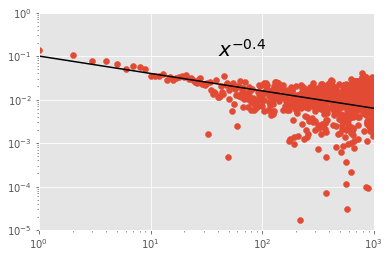

In [23]:
# Parameters
s = 2
p = 16
eps = 0.01
n_minority_agents = 0
n_producer_agents = 1000
n_speculator_agents = 501
n_iters = 50000
n_runs = 1

start_timestep = 30000

# Read data
dir_path = '../results/s{}_p{}_eps{:.2f}_nmins{}_npros{}_nspes{}_niters{}_nruns{}/'.format(
    s, p, eps, n_minority_agents, n_producer_agents, n_speculator_agents, n_iters, n_runs)

excess_demand_history = read_data(dir_path, 'excess_demand_history', 0)
excess_demand_history = excess_demand_history[start_timestep:]

taus = np.arange(1, 1001)
corrs = np.array([compute_autocorrelation(excess_demand_history, tau) for tau in taus])

plt.scatter(taus, corrs)

ws = np.float_power(taus, -0.4) * 0.1

plt.text(10 * 4, 1e-1, r'$x^{-0.4}$', fontsize=20)

plt.plot(taus, ws, c='black')

plt.xscale('log')
plt.yscale('log')

x_max, x_min = 1e+3, 1
y_max, y_min = 1, 1e-5

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

## Cumulative distribution of price returns

In [ ]:
def compute_cumulative_distribution(counts):
    sum_counts = np.sum(counts)
    ys = np.array([np.sum(counts[i:]) / sum_counts for i in range(len(counts))])
    return ys

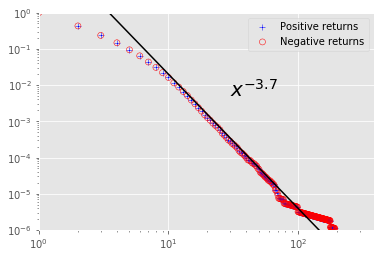

In [4]:
# Parameters
s = 2
p = 16
eps = 0.01
n_minority_agents = 0
n_producer_agents = 1200
n_speculator_agents = 1001
n_iters = 50000
n_runs = 1

start_timestep = 30000

# Read data
dir_path = '../results/s{}_p{}_eps{:.2f}_nmins{}_npros{}_nspes{}_niters{}_nruns{}/'.format(
    s, p, eps, n_minority_agents, n_producer_agents, n_speculator_agents, n_iters, n_runs)

excess_demand_history = read_data(dir_path, 'excess_demand_history', 0)
excess_demand_history = excess_demand_history[start_timestep:]

x_max = np.max(np.abs(excess_demand_history))
x_min = 1

return_positive = np.sort(np.array([elem for elem in excess_demand_history if elem > 0]))
return_negative = np.sort(np.array([- elem for elem in excess_demand_history if elem < 0]))

xs = np.linspace(x_min, x_max, x_max - x_min + 1, dtype='int32')
counts_positive, _ = np.histogram(return_positive, bins=xs.tolist() + [x_max + 1])
counts_negative, _ = np.histogram(return_positive, bins=xs.tolist() + [x_max + 1])

ys_positive = compute_cumulative_distribution(counts_positive)
ys_negative = compute_cumulative_distribution(counts_negative)

# Divide by return
ys_positive /= xs
ys_negative /= xs

y_max = 1
y_min = 1e-6

plt.scatter(xs, ys_positive, marker='+', facecolors='blue', edgecolors='none', label='Positive returns', linewidth=.5)
plt.scatter(xs, ys_negative, marker='o', facecolors='none', edgecolors='red', label='Negative returns', linewidth=.5)

# Powerlaw fitting
ws = np.float_power(xs, -3.7) * 100
plt.plot(xs, ws, c='black')

plt.text(10 * 3, 1e-2 * 0.5, r'$x^{-3.7}$', fontsize=20)

plt.xscale('log')
plt.yscale('log')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend()

plt.show()